# Datasets and Features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Earthquakes 
Data about earthquakes is from https://www.kaggle.com/usgs/earthquake-database

In [2]:
data_earthquakes = pd.read_csv("earthquakes.csv")[['Date', 'Time', 'Latitude', 'Longitude', 'Type',
                                                  'Depth', 'Magnitude', 'Magnitude Type']]

Depth and Magnitude columns visualisation:

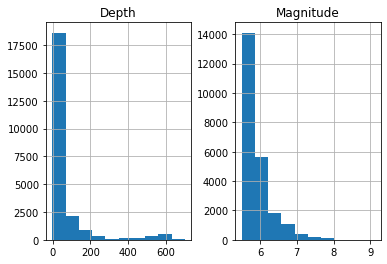

In [3]:
data_earthquakes[['Depth', 'Magnitude']].hist()
plt.show()

Unique values of column 'Type':

In [4]:
print(data_earthquakes['Type'].unique())

['Earthquake' 'Nuclear Explosion' 'Explosion' 'Rock Burst']


Keep only earthquakes:

In [5]:
data_earthquakes = data_earthquakes[data_earthquakes['Type'] == 'Earthquake']

## Volcanoes   
Data about volcanoes is from https://www.kaggle.com/smithsonian/volcanic-eruptions  
Data about eruptions is from https://volcano.si.edu/search_eruption.cfm

In [6]:
data_volcanoes = pd.read_csv("volcanoes.csv")  
data_eruptions = pd.read_csv("eruptions.csv")

In the volcanoes data table, we only retain those volcanoes that have eruption data:

In [7]:
volcanoes_with_eruptions = set()
for volcano in data_eruptions['Volcano Name']:
    volcanoes_with_eruptions.add(volcano)
volcanoes_with_eruptions = list(volcanoes_with_eruptions)
data_volcanoes = data_volcanoes[data_volcanoes.Name.isin(volcanoes_with_eruptions)]

Columns in the volcanoes data table:

In [8]:
print(data_volcanoes.columns)

Index(['Number', 'Name', 'Country', 'Region', 'Type', 'Activity Evidence',
       'Last Known Eruption', 'Latitude', 'Longitude', 'Elevation (Meters)',
       'Dominant Rock Type', 'Tectonic Setting'],
      dtype='object')


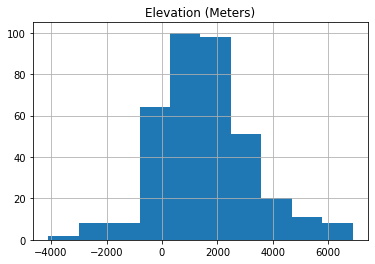

Column: Dominant Rock Type:
['Trachybasalt / Tephrite Basanite' 'Basalt / Picro-Basalt' 'No Data'
 'Trachyte / Trachydacite' 'Foidite' 'Andesite / Basaltic Andesite'
 'Phonolite' 'Rhyolite' nan 'Dacite'
 'Trachyandesite / Basaltic Trachyandesite']
Column: Tectonic Setting:
['Subduction Zone / Continental Crust (>25 km)'
 'Rift Zone / Oceanic Crust (< 15 km)'
 'Rift Zone / Intermediate Crust (15-25 km)'
 'Rift Zone / Continental Crust (>25 km)'
 'Intraplate / Continental Crust (>25 km)'
 'Intraplate / Oceanic Crust (< 15 km)'
 'Subduction Zone / Oceanic Crust (< 15 km)'
 'Subduction Zone / Crust Thickness Unknown'
 'Subduction Zone / Intermediate Crust (15-25 km)'
 'Intraplate / Intermediate Crust (15-25 km)']


In [9]:
data_volcanoes[['Elevation (Meters)']].hist()
plt.show()
print('Column: Dominant Rock Type:')
print(data_volcanoes['Dominant Rock Type'].unique())
print('Column: Tectonic Setting:')
print(data_volcanoes['Tectonic Setting'].unique())

### Visualization of volcanoes and earthquakes on a world map

In [11]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap

/home/tijana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/home/tijana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


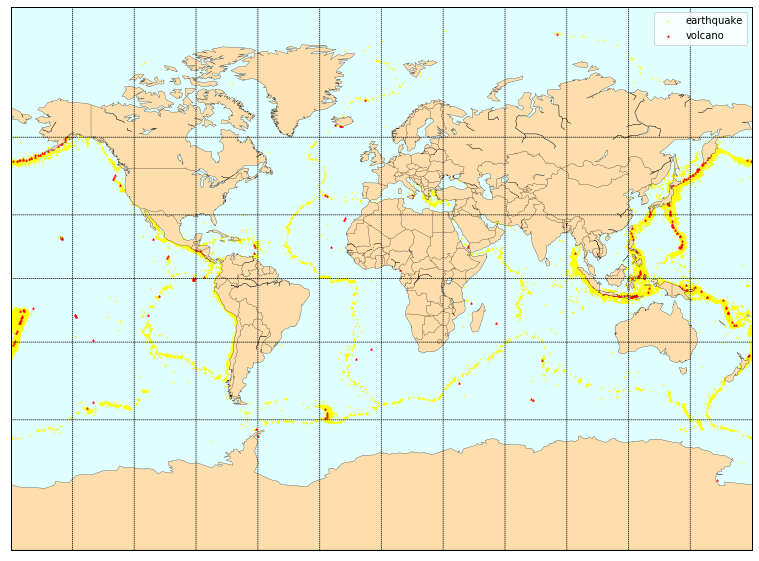

In [12]:
longitudes_vol = data_volcanoes["Longitude"].tolist()
latitudes_vol = data_volcanoes["Latitude"].tolist()

longitudes_eq = data_earthquakes["Longitude"].tolist()
latitudes_eq = data_earthquakes["Latitude"].tolist()

plt.figure(figsize=(20,10))
# iscrtavanje karte sveta
map = Basemap(projection='mill', llcrnrlat = -90, urcrnrlat = 90, llcrnrlon = -180, urcrnrlon = 180, resolution = 'c')
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='navajowhite',lake_color='lightcyan')
map.drawmapboundary(fill_color='lightcyan')

map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

# iscrtavanje zemljotresa i vulkana na osnovu koordinata
map.scatter(longitudes_eq, latitudes_eq, latlon=True, s=0.5, c='yellow', label='earthquake')
map.scatter(longitudes_vol, latitudes_vol, latlon=True, s=2, c='r', marker='^', label='volcano')
plt.legend()
plt.show()

Amount of earthquakes and eruptions by year:

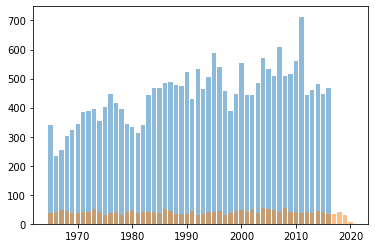

In [10]:
years_earthquakes = [0 for i in range(1965,2021)]
for date in data_earthquakes['Date']:
    try:
        year = int(date[6:10])
    except:
        year = int(date[0:4])
    years_earthquakes[year-1965] += 1

years_eruptions = [0 for i in range(1965,2021)]
for date in data_eruptions['Start Date']:
    year = int(date[0:4])
    years_eruptions[year-1965] += 1

plt.bar(range(1965,2021), years_earthquakes, align='center', alpha=0.5, label='earthquakes')
plt.bar(range(1965,2021), years_eruptions, align='center', alpha=0.5, label='eruptions')
plt.show()

Merged table - eruptions with volcano details:

In [11]:
data_eruptions_detailed = pd.merge(left=data_eruptions, right=data_volcanoes, 
                                   left_on='Volcano Name', right_on='Name')
print(data_eruptions_detailed.shape)
print(data_eruptions.shape)

(2294, 16)
(2215, 4)


Function that calculates the distance between two places given by the latitude and longitude coordinates:

In [14]:
def distance_lat_lon(lat1, lon1, lat2, lon2):
    R = 6373.0
    dist_lat = lat2 - lat1
    dist_lon = lon2 - lon1
    a = math.sin(dist_lat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dist_lon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance